# **Regresion Lineal**

La regresión lineal es un método estadístico y matemático que se utiliza para encontrar la relación entre dos o más variables. Su objetivo es predecir o explicar una variable (llamada dependiente) a partir de otra u otras variables (llamadas independientes). Realiza una predicción simplemente calculando una **suma ponderada de las características de entrada**, más una constante llamada **término de sesgo** (también conocido como **intercepto**)

La ecuacion es:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$


Donde:
- **ŷ** es el valor predicho.  
- **n** es el número de características (features).  
- **xᵢ** es el valor de la i-ésima característica.  
- **θⱼ** es el j-ésimo parámetro del modelo (incluyendo el término de sesgo **θ₀** y los pesos de las características **θ₁, θ₂, …, θₙ**).

Esto puede escribirse de manera mucho más concisa utilizando una **forma vectorizada**:

$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$


Donde:
- **θ** es el **vector de parámetros del modelo**, que contiene el término de sesgo **θ₀** y los pesos de las características **θ₁** a **θₙ**.  
- **X** es el **vector de características de una instancia**, que contiene **x₀** a **xₙ**, donde **x₀** es siempre igual a **1**.  
- **θ · x** es el **producto punto** de los vectores **θ** y **x**, que equivale a $θ_0 x_0 + θ_1 x_1 + θ_2 x_2 + \cdots + θ_n x_n $
- **$h_θ$** es la **función hipótesis**, que utiliza los parámetros del modelo **θ**.

El error asociado a un modelo $\theta = ( \theta_0,  \theta_1 , \ldots,  \theta_k)$ con respecto a un conjunto de datos se expresa como el error medio cuadratico:

$$
MSE(x,h_θ) = \frac{1}{N}\sum_{i=0}^N \left(y^{(i)} - (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)})\right)^2
$$
$$
MSE(x, h_θ) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \theta^T x^{(i)})^2   
$$

## La Ecuación Normal

Para encontrar el valor de **θ** que **minimiza la función de costo**, existe una **solución de forma cerrada**, es decir, una **ecuación matemática que proporciona el resultado directamente**.  
A esta se le conoce como la **Ecuación Normal**:

$$
\theta = (X^T X)^{-1} X^T y
$$

Donde:
- **θ** es el vector de parámetros que **minimiza la función de costo**.  
- **X** es la **matriz de características** del conjunto de entrenamiento.  
- **y** es el **vector de valores objetivo**, que contiene $ y^{(1)} $ hasta $ y^{(m)} $.  
- $ (X^T X)^{-1} X^T y $ representa la **solución directa** para obtener los parámetros óptimos sin necesidad de un proceso iterativo.



### **Implementacion**

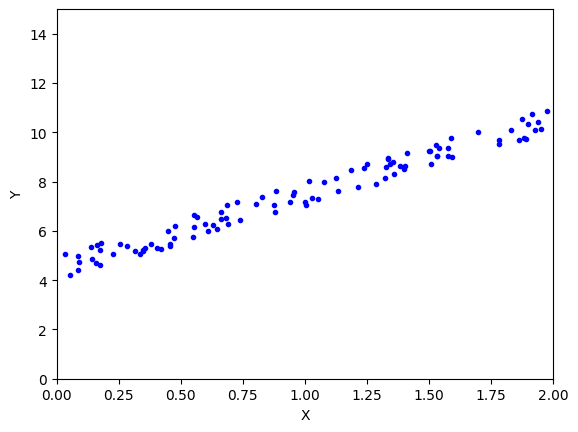

In [1]:
# Generando datos
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  + np.random.rand(100, 1)

# Gráfica de dispersión
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
def add_bias(X):
    """Devuelve una nueva matriz con una columna de 1s al principio (X_0=1)."""
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b

def normal_equation(X, y):
   X_b = add_bias(X)
   theta = np.linalg.inv(X_b.T @ X_b)  @ X_b.T @ y
   return theta

Intercerpto: [4.53609657] y coeficiente: [2.95752923]
La prediccion es:[[ 4.53609657]
 [10.45115502]]


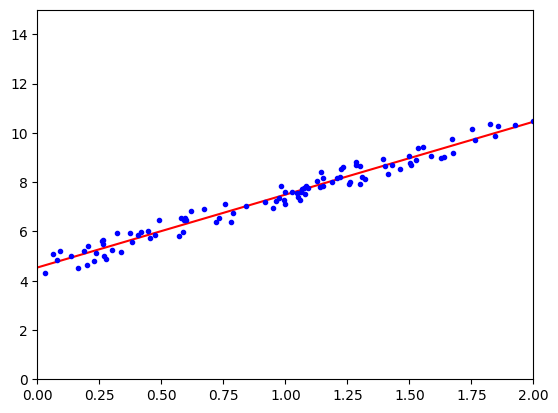

In [17]:
# Calculando los parametros
theta_best = normal_equation(X,y)
print(f"Intercerpto: {theta_best[0]} y coeficiente: {theta_best[1]}")

# Prediciendo un valor
X_new = np.array([[0],[2]])
X_new_b = add_bias(X_new)           # Se agrega el X_0=1 para el bias
y_predict = X_new_b @ theta_best
print(f"La prediccion es:{y_predict}")

# Mostrar Prediccion
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### **Implementacion con sklearn**

Intercerpto: [4.53609657] y coeficiente: [[2.95752923]]
La prediccion es: [[ 4.53609657]
 [10.45115502]]


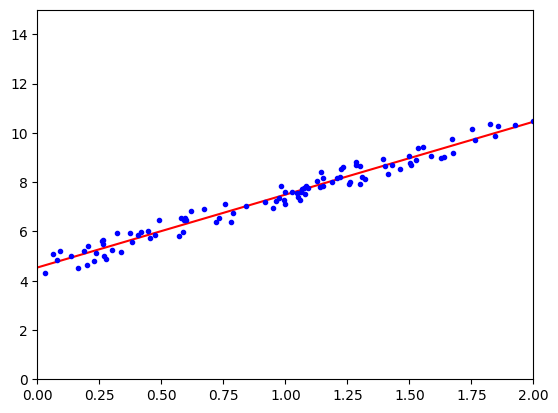

In [20]:
from sklearn.linear_model import LinearRegression

# Calculando parametos
lin_reg = LinearRegression()
lin_reg.fit(X,y)

print(f"Intercerpto: {lin_reg.intercept_} y coeficiente: {lin_reg.coef_}")

# Calculando prediccion
y_predict_new = lin_reg.predict(X_new)

print(f"La prediccion es: {y_predict_new}")

# Mostrar Prediccion
plt.plot(X_new, y_predict_new, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Complejidad Computacional

La Ecuación Normal calcula la inversa de $X^T X$, que es una matriz de $(n + 1) \times (n + 1)$ (donde $n$ es el número de características). La complejidad computacional de invertir una matriz de este tipo es típicamente de alrededor de $O(n^{2.4})$ a $O(n^3)$ (dependiendo de la implementación). En otras palabras, si duplicas el número de características, multiplicas el tiempo de computación por aproximadamente $2^{2.4} = 5.3$ a $2^3 = 8$.

El enfoque SVD (Descomposición en Valores Singulares) utilizado por la clase LinearRegression de Scikit-Learn es de aproximadamente $O(n^2)$. Si duplicas el número de características, multiplicas el tiempo de computación por aproximadamente 4.